# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import requests
import time
from bs4 import BeautifulSoup as bs


Get into the URL

In [2]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {'User-agent': 'Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-G973U) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/14.2 Chrome/87.0.4280.141 Mobile Safari/537.36'}

tesla= requests.get(url, timeout=(5), headers=headers)

Return the tables

In [3]:
html = tesla.text
soup = bs(html, 'html.parser')
tables = soup.find_all('table')

Find table Quarterly-Revenue

In [4]:
for table in tables:
    if "Tesla Quarterly Revenue" in table.get_text():
        quarterly_table = table

Return the data by columns

In [5]:
data = []
for row in quarterly_table.find_all("tr")[1:]:
    cells = row.find_all(["th", "td"])
    date = cells[0].get_text()
    revenue = cells[1].get_text()
    data.append([date, revenue])

Became into DataFrame

In [6]:
tesla_df = pd.DataFrame(data, columns=["date", "revenue"])

Cleaning Dataframe

In [7]:
tesla_df = tesla_df.replace("", None)
tesla_df['revenue'] = tesla_df['revenue'].replace("[$,]", "", regex=True)
tesla_df = tesla_df.dropna()

Became DataFrame into SQL

In [8]:
con = sqlite3.connect("tesla.db")

cur = con.cursor()

tesla_df.to_sql("tesla_data", con= con, if_exists="replace", index=False)

56

Convert column Date into a type date

In [9]:
cur.execute("""UPDATE tesla_data SET date = strftime('%Y-%m-%d', date)""")
con.commit()

Making a Query

In [10]:
cur.execute("""SELECT strftime('%Y', date) AS year, SUM(revenue) as total_revenue from tesla_data GROUP BY year""")
query1 = cur.fetchall()
con.close()
query1

[('2009', 73),
 ('2010', 116),
 ('2011', 204),
 ('2012', 413),
 ('2013', 2013),
 ('2014', 3199),
 ('2015', 4046),
 ('2016', 7000),
 ('2017', 11759),
 ('2018', 21461),
 ('2019', 24578),
 ('2020', 31536),
 ('2021', 53823),
 ('2022', 81462),
 ('2023', 48256)]

Converting Query into DataFrame

In [11]:
query = pd.DataFrame(query1, columns = ["year", "revenue"])
query

,year,revenue
0,2009,73
1,2010,116
2,2011,204
3,2012,413
4,2013,2013
5,2014,3199
6,2015,4046
7,2016,7000
8,2017,11759
9,2018,21461


1 Vizualization

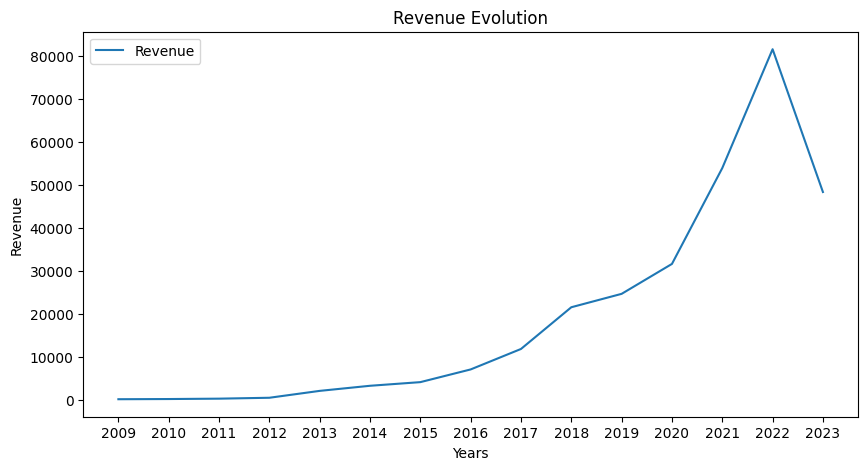

In [15]:
plt.figure(figsize = (10, 5))
years = query["year"]
revenues = query["revenue"]

plt.plot(years, revenues, label="Revenue")

plt.title("Revenue Evolution")
plt.ylabel("Revenue")
plt.xlabel("Years")
plt.legend()
plt.show()

2 Vizualization

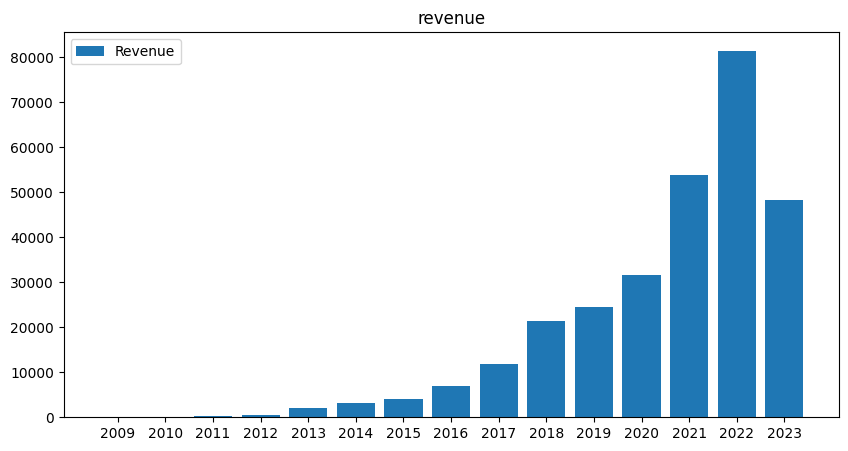

In [13]:
plt.figure(figsize = (10, 5))
years = query["year"]
revenues = query["revenue"]

plt.bar(years, revenues, label = "Revenue")

plt.title("revenue")
plt.legend()
plt.show()

3 Vizualization

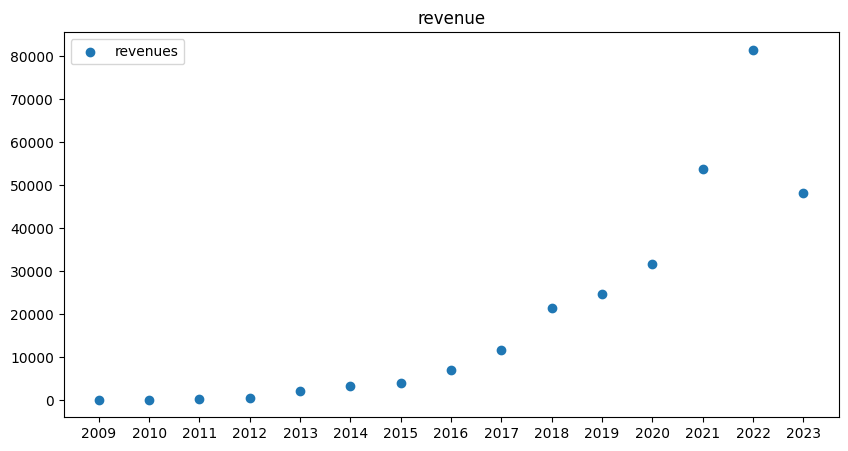

In [14]:
plt.figure(figsize = (10, 5))
years = query["year"]
revenues = query["revenue"]

plt.scatter(years, revenues, label = "revenues")

plt.title("revenue")
plt.legend()
plt.show()